# Faktor Apakah yang Menjual Sebuah Mobil?

&nbsp; Tujuan dari analisa adalah mempelajari tayangan iklan selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.
Proses analisa akan dimulai dengan pemuatan data dan melihat informasi umum yang ada pada data tersebut dan melihat apakah ada nilai hilang pada dataset tersebut.

## Pra-pemrosesan

In [1]:
# library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Memuat Data

In [2]:
# DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
# Informasi/rangkuman umum tentang DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Sampel data

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


&nbsp; Berdasarkan informasi diatas, terdapat nilai kosong/*NaN* pada 5 kolom, dan tipe data pada 3 kolom tidak sesuai. Kolom `date_posted` dapat kita ubah tipe datanya menjadi *date* untuk mempermudah proses analisa.

In [6]:
df.duplicated().sum()

0

&nbsp; Tidak terdapat data duplikat pada dataset.

In [7]:
df['is_4wd'].isna().sum()

25953

In [8]:
df['is_4wd'].dtype

dtype('float64')

In [9]:
df['is_4wd'].unique()

array([ 1., nan])

&nbsp; Kolom dengan nilai hilang terbanyak ada pada kolom `is_4wd` dengan tipe data *float*.

### Kesimpulan dan Langkah-Langkah Selanjutnya

&nbsp; Perlu dilakukannya pra-pemrosesan pada dataset karena adanya nilai hilang pada beberapa kolom dan tipe data yang tidak sesuai. 

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

### Nilai hilang pada kolom `is_4wd`

In [10]:
df['is_4wd'].unique()

array([ 1., nan])

&nbsp; Dikarenakan nilai unik pada kolom `is_4wd` hanya ada 2, *1* dan *NaN*, maka dapat kita asumsikan bahwa nilai *NaN* adalah mobil dengan tipe 2wd. Nilai hilang dapat diisi dengan nilai *0* untuk merepresentasi mobil dengan tipe 2wd. Kolom tersebut merupakan kolom dengan nilai *binary* atau tipe data *boolean*. 

In [11]:
df['is_4wd'].fillna(0, inplace=True)
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [12]:
df['is_4wd'].isna().sum()

0

### Nilai hilang pada kolom `model_year`, `cylinders`, `odometer`, dan `paint_color`

In [13]:
# Persentase nilai hilang dari keseluruhan total baris.

prcnt_model_year = round((df['model_year'].isnull().sum())/(len(df))*100,2)
prcnt_cylinders = round((df['cylinders'].isnull().sum())/(len(df))*100,2)
prcnt_paint_color = round((df['paint_color'].isnull().sum())/(len(df))*100,2)
prcnt_odo = round((df['odometer'].isnull().sum())/(len(df))*100,2)

print(f'{prcnt_model_year}% \n\
{prcnt_cylinders}%\n\
{prcnt_paint_color}%\n\
{prcnt_odo}%')

7.02% 
10.21%
17.99%
15.32%


&nbsp; Kolom dengan nilai hilang terbanyak ada pada kolom `paint_color` yaitu sebanyak 17,99%. Jika kolom tersebut di-*drop*, maka keseluruhan data akan berubah secara signifikan dan proses analisa akan berdampak sangat besar.

&nbsp; Kita akan melihat lebih lanjut masing-masing kolom dengan nilai yang hilang. 

In [14]:
# Memeriksa baris dimana baris tersebut memiliki 4 kolom dengan nilai kosong

nan_column = df[df['model_year'].isna() & df['cylinders'].isna() & df['odometer'].isna() & df['paint_color'].isna()]

In [15]:
len(nan_column)

9

&nbsp; Dikarenakan terdapat baris yang memiliki nilai hilang pada 3 atau lebih kolom, maka akan kita *drop* baris-baris tersebut.

In [16]:
# Drop baris

len(df)

51525

In [17]:
x = df.dropna(subset=['model_year', 'cylinders', 'odometer', 'paint_color'], how='all')
x = df.dropna(subset=['model_year', 'cylinders'], how='all')
len(x)

51162

In [18]:
df = x
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51162 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51162 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51162 non-null  object 
 3   condition     51162 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51162 non-null  object 
 6   odometer      43329 non-null  float64
 7   transmission  51162 non-null  object 
 8   type          51162 non-null  object 
 9   paint_color   41946 non-null  object 
 10  is_4wd        51162 non-null  float64
 11  date_posted   51162 non-null  object 
 12  days_listed   51162 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [19]:
# Mengatasi nilai hilang pada kolom 'model_year'

df['model_year'].isna().sum()

3256

&nbsp; Kita akan berasumsi bahwa adanya nilai hilang pada kolom `model_year` dikarenakan pengguna lalai mencantumkan dan/atau lupa tahun model mobil itu sendiri. Kita akan drop baris nilai kosong pada kolom `model_year.` 

In [20]:
df.dropna(subset=['model_year'], how='any', inplace=True)
df['model_year'].isna().sum()

0

In [21]:
# Mengatasi nilai hilang pada kolom `cylinders`

df['cylinders'].isna().sum()

4897

&nbsp; Nilai hilang pada kolom `cylinders` akan kita ubah dengan median sesuai dengan model kendaraan.

In [22]:
cylinders_group = df.pivot_table(
    index = 'model',
    values  = 'cylinders',
    aggfunc = 'median'
)


In [23]:
cylinders_group.info()
cylinders_group.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, acura tl to volkswagen passat
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cylinders  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [24]:
cylinders_group

,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


In [25]:
fill_dict = cylinders_group.set_index('model')['cylinders'].to_dict()

In [26]:
df['cylinders'] = df['cylinders'].fillna(df['model'].map(fill_dict))
df['cylinders'].isna().sum()

0

In [27]:
df['cylinders'].value_counts()

8.0     16444
6.0     16260
4.0     14382
10.0      517
5.0       268
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [28]:
# Mengatasi nilai hilang pada kolom `odometer`

df['odometer'].isna().sum()

7343

&nbsp; Nilai hilang pada kolom `odometer` akan kita ubah dengan median odometer sesuai dengan jenis kondisi kendaraan yang ada.

In [29]:
odo_cond = df.groupby('condition')['odometer'].median()
odo_dict = odo_cond.to_dict()

In [30]:
df['odometer'] = df['odometer'].fillna(df['condition'].map(odo_dict))
df['odometer'].isna().sum()

0

In [31]:
# Kolom `paint_color`

df['paint_color'].isna().sum()

8615

&nbsp; Kita akan mengubah isi dengan nilai kosong pada kolom `paint_color` dengan nilai 'undefined'.

In [32]:
df['paint_color'].fillna('undefined', inplace=True)
df['paint_color'].value_counts()

white        9324
undefined    8615
black        7176
silver       5811
grey         4686
blue         4143
red          4138
green        1278
brown        1120
custom       1074
yellow        239
orange        207
purple         95
Name: paint_color, dtype: int64

## Memperbaiki Tipe Data

### Memperbaiki tipe data kolom `model_year`

In [33]:
# Memperbaiki tipe data kolom `model_year` menjadi 'object'

df['model_year'] = df['model_year'].astype('int')
df['model_year']

0        2011
2        2013
3        2003
4        2017
5        2014
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 47906, dtype: int64

### Memperbaiki tipe data kolom `ordometer`

In [34]:
# Memperbaiki tipe data kolom `ordometer' menjadi 'int64'

df['odometer'] = df['odometer'].astype('int')
df['odometer']

0        145000
2        110000
3        182076
4         80903
5         57954
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524    129000
Name: odometer, Length: 47906, dtype: int64

### Memperbaiki tipe data kolom `cylinders`

In [35]:
# Mengubah tipe data kolom `cylinders` menjadi int

df['cylinders'] = df['cylinders'].astype('int')
df['cylinders']

0        6
2        4
3        8
4        4
5        6
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 47906, dtype: int64

### Memperbaiki tipe data kolom `is_4wd`

In [36]:
# Mengubah tipe data kolom `is_4wd` menjadi boolean

df['is_4wd'] = df['is_4wd'].astype('bool') 
df['is_4wd'].unique()

array([ True, False])

### Mengubah tipe data kolom `date_posted`

In [37]:
# Mengubah tipe data kolom `date_posted` menjadi 'datetime'

df['date_posted'] = pd.to_datetime(df['date_posted'])
df['date_posted']

0       2018-06-23
2       2019-02-07
3       2019-03-22
4       2019-04-02
5       2018-06-20
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 47906, dtype: datetime64[ns]

## Memperbaiki Kualitas Data

[Berikan faktor tambahan pada data agar lebih mudah dianalisis.]

In [38]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['date_posted']
df['year_posted'] = df['date_posted'].dt.year

In [39]:
df['year_posted']

0        2018
2        2019
3        2019
4        2019
5        2018
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: year_posted, Length: 47906, dtype: int64

In [40]:
# Tambahkan usia kendaraan saat iklan ditayangkan

df['car_age'] = df['year_posted'] - df['model_year']

df['car_age'] = df['car_age'].replace(0,1)
df[df['car_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age


In [41]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 

df['dist_per_year'] = round(df['odometer'] / df['car_age'],2)
df['dist_per_year']

0        20714.29
2        18333.33
3        11379.75
4        40451.50
5        14488.50
           ...   
51520    17627.20
51521    11343.75
51522    14222.22
51523    27914.60
51524    32250.00
Name: dist_per_year, Length: 47906, dtype: float64

In [42]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
# Mengganti nilai pada kolom `condition` dengan angka yang merepresentasikan nilai-nilai di dalamnya

df['condition'].unique()
condition_dict = {'salvage': 0,
                 'fair': 1,
                 'good': 2,
                 'excellent': 3,
                 'like new': 4,
                 'new': 5}

df['condition'] = df['condition'].map(condition_dict)
df['condition']

0        2
2        4
3        1
4        3
5        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 47906, dtype: int64

## Memeriksa Data yang Sudah Bersih

[Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.]

In [43]:
# tampilkan informasi/rangkuman umum tentang DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          47906 non-null  int64         
 1   model_year     47906 non-null  int64         
 2   model          47906 non-null  object        
 3   condition      47906 non-null  int64         
 4   cylinders      47906 non-null  int64         
 5   fuel           47906 non-null  object        
 6   odometer       47906 non-null  int64         
 7   transmission   47906 non-null  object        
 8   type           47906 non-null  object        
 9   paint_color    47906 non-null  object        
 10  is_4wd         47906 non-null  bool          
 11  date_posted    47906 non-null  datetime64[ns]
 12  days_listed    47906 non-null  int64         
 13  year_posted    47906 non-null  int64         
 14  car_age        47906 non-null  int64         
 15  dist_per_year  4790

In [44]:
# tampilkan sampel data

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,dist_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,undefined,True,2018-06-23,19,2018,7,20714.29
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33
3,1500,2003,ford f-150,1,8,gas,182076,automatic,pickup,undefined,False,2019-03-22,9,2019,16,11379.75
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.50
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.50


In [45]:
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,dist_per_year
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,5,17627.20
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,16,11343.75
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,9,14222.22
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,5,27914.60
51524,6300,2014,nissan altima,2,4,gas,129000,automatic,sedan,undefined,False,2018-06-05,10,2018,4,32250.00


## Mempelajari Parameter Inti 

- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [46]:
# Parameter Harga (kolom `price`)

df['price'].describe()

count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

<AxesSubplot:>

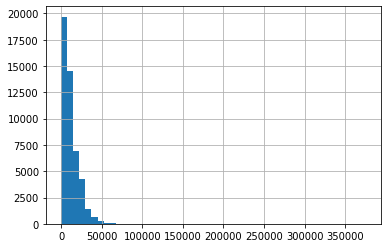

In [47]:
df['price'].hist(bins = 50)

<AxesSubplot:>

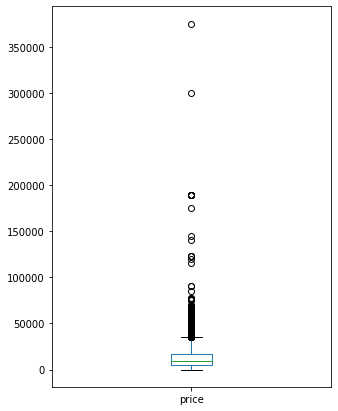

In [48]:
df['price'].plot(kind='box', figsize=(5,7))

In [49]:
# Parameter usia kendaraan (kolom `car_age`)

df['car_age'].describe()

count    47906.000000
mean         8.601386
std          6.237996
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

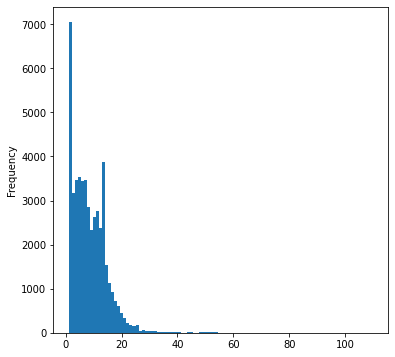

In [50]:
df['car_age'].plot(kind='hist', bins=100, figsize=(6,6))

<AxesSubplot:>

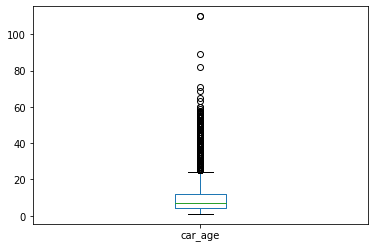

In [51]:
df['car_age'].plot(kind='box')

In [52]:
# Parameter jarak tempuh (kolom 'dist_per_year')

df['dist_per_year'].describe()

count     47906.000000
mean      19138.774962
std       16602.811233
min           0.000000
25%       10401.400000
50%       15000.000000
75%       22000.000000
max      373200.000000
Name: dist_per_year, dtype: float64

<AxesSubplot:>

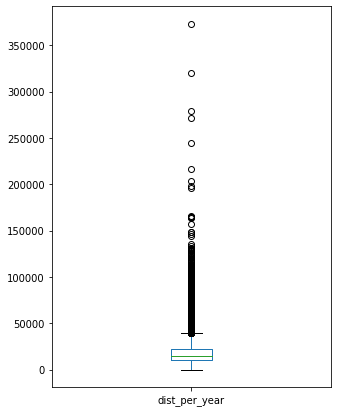

In [53]:
df['dist_per_year'].plot(kind='box', figsize=(5,7))

<AxesSubplot:>

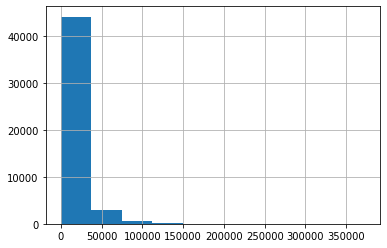

In [54]:
df['dist_per_year'].hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

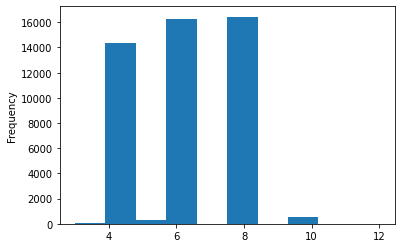

In [55]:
# Kolom `cylinders`

df['cylinders'].plot(kind='hist', bins=10)

<AxesSubplot:>

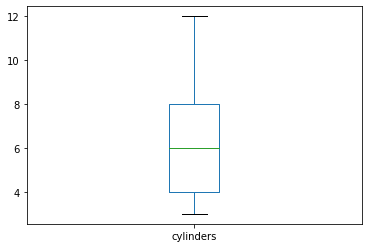

In [56]:
df['cylinders'].plot(kind='box')

&nbsp; Berdasarkan beberapa grafik diatas, terlihat bahwa tidak terdapat outlier pada kolom `cylinders` pada keseluruhan data. Sebagian besar mobil yang akan dijual memiliki cylinder sebanyak 4, 8, atau 6.

<AxesSubplot:>

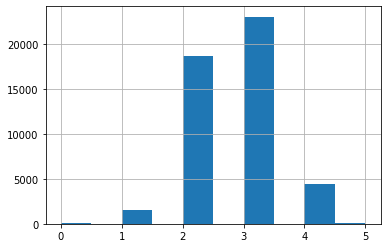

In [57]:
# Kolom `condition`

df['condition'].hist()

In [58]:
condition_df = df\
.pivot_table(
        index = 'condition',
        values = 'model',
        aggfunc = 'count'
)\
.reset_index()
condition_df.columns = ['cond', 'count']
condition_df.sort_values(by='count', inplace=True)

<AxesSubplot:xlabel='cond'>

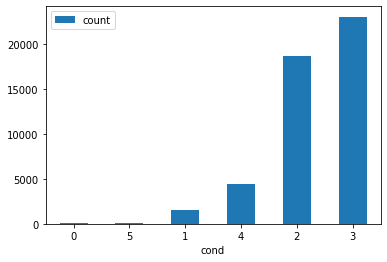

In [59]:
condition_df.plot(kind='bar', x = 'cond', y='count', rot=0)

<AxesSubplot:>

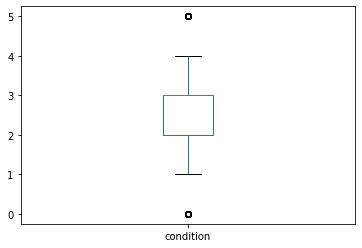

In [60]:
df['condition'].plot(kind='box')

## Mempelajari dan Menangani Outlier

&nbsp; Outlier yang kita temukan ada pada 4 kolom yaitu `price`, `car_age`, `dist_per_year`, dan `condition`. Kita akan tangani outlier pada kolom-kolom tersebut

In [61]:
columns_out = ['price', 'car_age', 'dist_per_year', 'condition']

<AxesSubplot:>

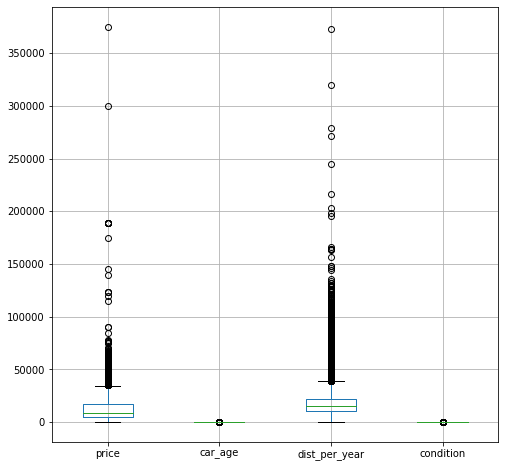

In [62]:
df[columns_out].boxplot(figsize = (8,8))

<AxesSubplot:>

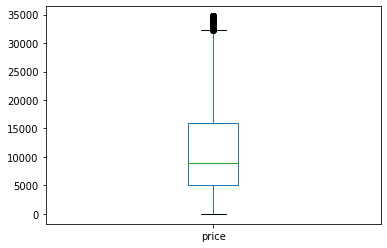

In [63]:
# Fungsi mencari IQR, batas atas dan batas bawah

def iqr_func(dataframe):
    return dataframe.quantile(0.75) - dataframe.quantile(0.25)

def upper(dataframe, iqr):
    return dataframe.quantile(0.75)+1.5*iqr

def lower(dataframe, iqr):
    return dataframe.quantile(0.25)-1.5*iqr

# Menghilangkan outlier pada kolom `price`
iqr_price = iqr_func(df['price'])
upper_price = upper(df['price'],iqr_price)
lower_price = lower(df['price'],iqr_price)

df_non_outlier = df[(df['price'] <= upper_price) & (df['price']>=lower_price)]
df_non_outlier['price'].plot(kind='box')

<AxesSubplot:>

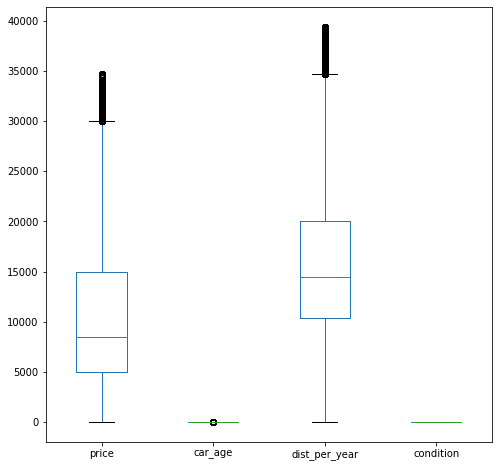

In [64]:
# Menghilangkan outlier pada kolom `car_age`, `dist_per_year`, dan `condition`

for col in ['car_age', 'dist_per_year', 'condition']:
    iqr = iqr_func(df[col])
    upper_iqr = upper(df[col], iqr)
    lower_iqr = lower(df[col], iqr)
    df_non_outlier = df_non_outlier[(df_non_outlier[col]<=upper_iqr) & (df_non_outlier[col]>=lower_iqr)]

df_non_outlier[columns_out].plot(kind = 'box', figsize =(8,8))


## Mempelajari Parameter Inti Tanpa Outlier

In [65]:
df_non_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42388 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          42388 non-null  int64         
 1   model_year     42388 non-null  int64         
 2   model          42388 non-null  object        
 3   condition      42388 non-null  int64         
 4   cylinders      42388 non-null  int64         
 5   fuel           42388 non-null  object        
 6   odometer       42388 non-null  int64         
 7   transmission   42388 non-null  object        
 8   type           42388 non-null  object        
 9   paint_color    42388 non-null  object        
 10  is_4wd         42388 non-null  bool          
 11  date_posted    42388 non-null  datetime64[ns]
 12  days_listed    42388 non-null  int64         
 13  year_posted    42388 non-null  int64         
 14  car_age        42388 non-null  int64         
 15  dist_per_year  4238

In [66]:
df_non_outlier.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,dist_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,undefined,True,2018-06-23,19,2018,7,20714.29
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33
3,1500,2003,ford f-150,1,8,gas,182076,automatic,pickup,undefined,False,2019-03-22,9,2019,16,11379.75
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.50
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.00


In [67]:
# Kolom `price`
df_non_outlier['price'].describe()

count    42388.000000
mean     10734.451071
std       7587.037036
min          1.000000
25%       4995.000000
50%       8500.000000
75%      14995.000000
max      34700.000000
Name: price, dtype: float64

<AxesSubplot:>

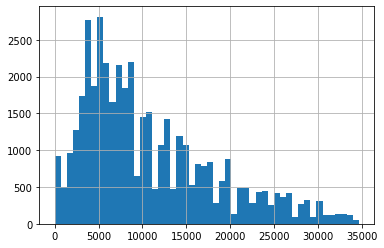

In [68]:
df_non_outlier['price'].hist(bins=50)

<AxesSubplot:>

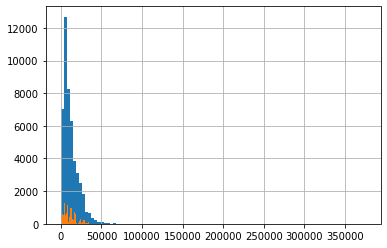

In [69]:
## Perbandingan kolom `price` sebelum dan sesudah outlier dihapus

df['price'].hist(bins=100)
df_non_outlier['price'].hist(bins=100)

<AxesSubplot:>

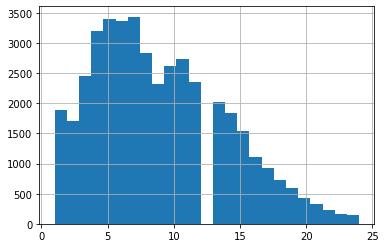

In [70]:
# Kolom `car_age`
df_non_outlier['car_age'].hist(bins=25)

<AxesSubplot:>

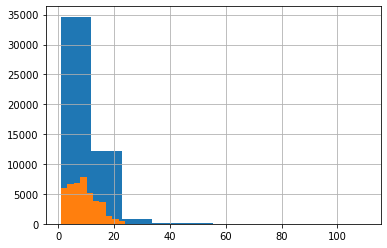

In [71]:
# Perbandingan dengan dan tanpa outlier pada kolom `car_age` 

df['car_age'].hist()
df_non_outlier['car_age'].hist()

<AxesSubplot:>

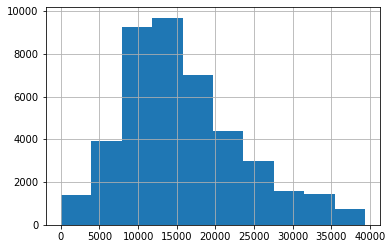

In [72]:
# Kolom `dist_per_year` tanpa outlier

df_non_outlier['dist_per_year'].hist()

<AxesSubplot:>

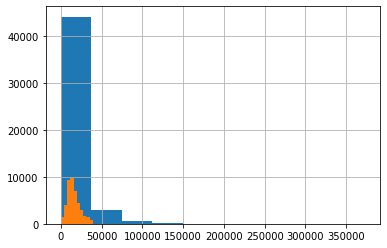

In [73]:
# Perbandingan dengan dan tanpa outlier pada kolom `dist_per_year` 

df['dist_per_year'].hist()
df_non_outlier['dist_per_year'].hist()

<AxesSubplot:>

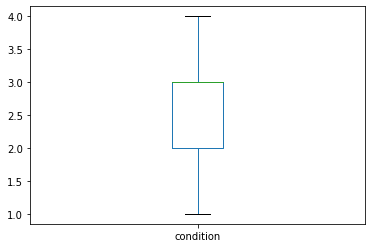

In [74]:
# Kolom `condition` tanpa outlier

df_non_outlier['condition'].plot(kind='box')

## Masa Berlaku Iklan 

In [75]:
df_non_outlier['days_listed'].describe()

count    42388.000000
mean        39.567189
std         28.243638
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

&nbsp; Iklan ditayangkan umumnya selama 33 hingga 39 hari.

<AxesSubplot:ylabel='Frequency'>

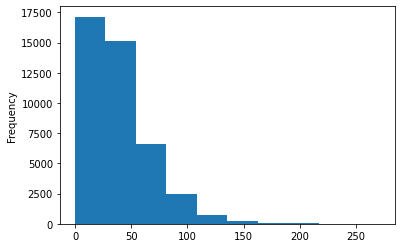

In [76]:
df_non_outlier['days_listed'].plot(kind='hist')

&nbsp; Iklan terhitung ditayangkan dengan waktu yang cepat adalah iklan dengan lama dibawah 19 hari (Q1), dan iklan terhitung dihapus/ditayangkan lebih lama adalah iklan dengan lama diatas 53 hari (Q3).  

## Harga Rata-Rata Setiap Jenis Kendaraan

<AxesSubplot:xlabel='car_type'>

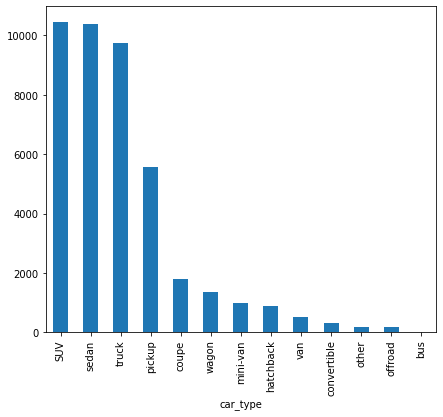

In [77]:
car_type_count = df_non_outlier.groupby('type')['model']\
                                                .count()\
                                                .sort_values(ascending=False)
car_type_count.index.name = 'car_type'
car_type_count.plot(kind='bar', figsize = (7,6))

&nbsp; Jenis kendaraan dengan iklan terbanyak adalah jenis 'SUV' dan 'Sedan'.

In [78]:
mean_type = df_non_outlier.groupby('type')['price'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='type'>

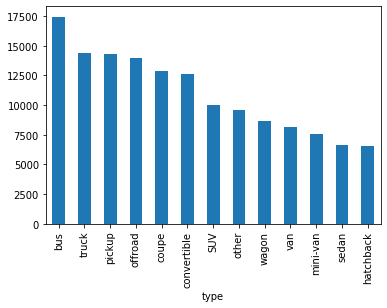

In [79]:
mean_type.plot(kind='bar')

## Faktor Harga

In [80]:
# Inisiasi dataframe dengan tipe 'SUV' dan 'sedan'
suv_df = df_non_outlier.query('type == "SUV"')
sedan_df = df_non_outlier.query('type == "sedan"')

suv_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,dist_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,undefined,True,2018-06-23,19,2018,7,20714.29
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,6,18245.50
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,undefined,True,2018-07-16,19,2018,6,17362.33
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,11,13381.00
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,2019,10,13228.50


In [81]:
sedan_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age,dist_per_year
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.33
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.50
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.00
11,8990,2012,honda accord,3,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,2019,7,15877.43
13,16500,2018,hyundai sonata,3,4,gas,22104,automatic,sedan,silver,False,2019-01-14,29,2019,1,22104.00


In [82]:
# Filter untuk variabel kategori dengan jumlah iklan lebih dari 50 untuk dataframe tipe kendaraan SUV

for col in ['transmission', 'paint_color']:
    print(suv_df.groupby(col)['model'].count().sort_values(ascending=False))

suv_df = suv_df.loc[~suv_df['paint_color'].isin(['yellow','orange','purple'])]
suv_df['paint_color'].value_counts()

transmission
automatic    9899
manual        422
other         131
Name: model, dtype: int64
paint_color
undefined    1879
black        1836
white        1604
silver       1345
grey         1004
blue          886
red           792
green         382
brown         318
custom        270
orange         62
yellow         38
purple         36
Name: model, dtype: int64


undefined    1879
black        1836
white        1604
silver       1345
grey         1004
blue          886
red           792
green         382
brown         318
custom        270
Name: paint_color, dtype: int64

In [83]:
# Filter untuk variabel kategori dengan jumlah iklan lebih dari 50 untuk dataframe tipe kendaraan SUV

for col in ['transmission', 'paint_color']:
    print(sedan_df.groupby(col)['model'].count().sort_values(ascending=False))

sedan_df = sedan_df.loc[~sedan_df['paint_color'].isin(['yellow','orange','purple'])]
sedan_df['paint_color'].value_counts()

transmission
automatic    9765
manual        523
other         101
Name: model, dtype: int64
paint_color
undefined    1862
silver       1759
black        1506
grey         1370
white        1294
blue         1073
red           825
custom        240
brown         229
green         178
purple         25
yellow         20
orange          8
Name: model, dtype: int64


undefined    1862
silver       1759
black        1506
grey         1370
white        1294
blue         1073
red           825
custom        240
brown         229
green         178
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

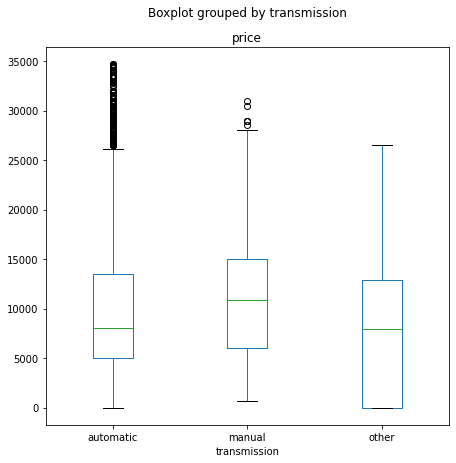

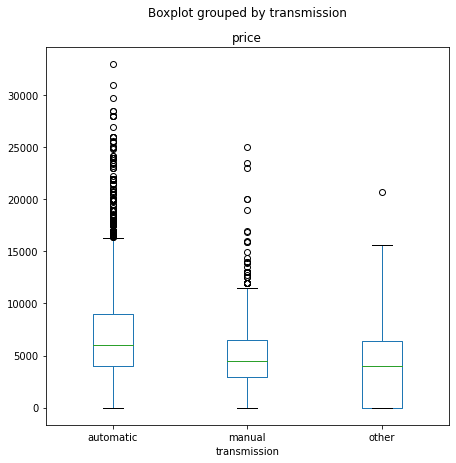

In [84]:
# Grafik variabel kategori 'transmission' terhadap 'price'

suv_df.boxplot(by='transmission', column='price', grid=False, figsize=(7,7))
sedan_df.boxplot(by='transmission', column='price', grid=False, figsize=(7,7))

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

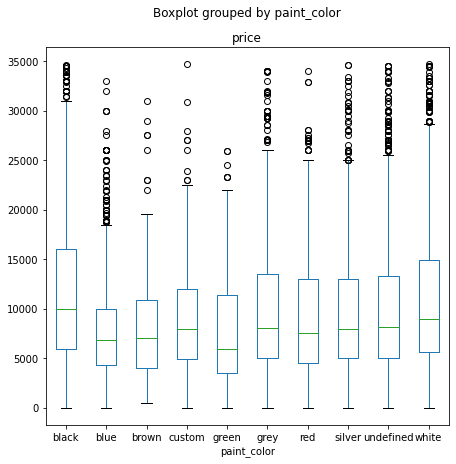

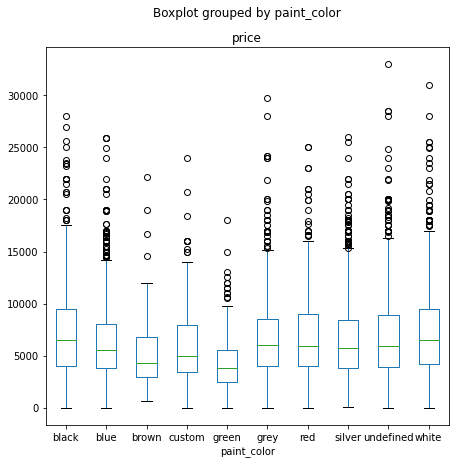

In [85]:
# Grafik variabel kategori 'paint_color' terhadap 'price'

suv_df.boxplot(by='paint_color', column='price', grid=False, figsize=(7,7))
sedan_df.boxplot(by='paint_color', column='price', grid=False, figsize=(7,7))

In [86]:
# Matriks korelasi variabel numerik usia kendaraan, jarak tempuh, kondisi, dan price pada-
# -dataframe kendaraan sedan

sedan_df[['car_age', 'dist_per_year', 'condition', 'price']].corr()

,car_age,dist_per_year,condition,price
car_age,1.000000,-0.548464,-0.309908,-0.629228
dist_per_year,-0.548464,1.000000,0.033609,0.245414
condition,-0.309908,0.033609,1.000000,0.299287
price,-0.629228,0.245414,0.299287,1.000000


In [87]:
# Matriks korelasi variabel numerik usia kendaraan, jarak tempuh, kondisi, dan price pada-
# -dataframe kendaraan SUV

suv_df[['car_age', 'dist_per_year', 'condition', 'price']].corr()

,car_age,dist_per_year,condition,price
car_age,1.000000,-0.604412,-0.326306,-0.598815
dist_per_year,-0.604412,1.000000,0.058602,0.321698
condition,-0.326306,0.058602,1.000000,0.264950
price,-0.598815,0.321698,0.264950,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


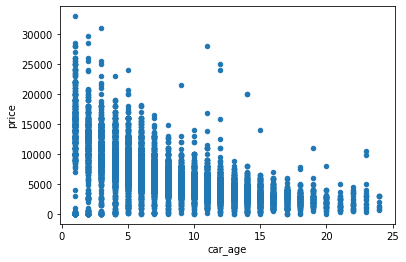

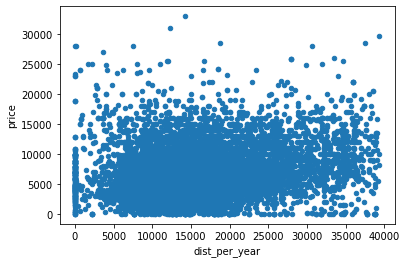

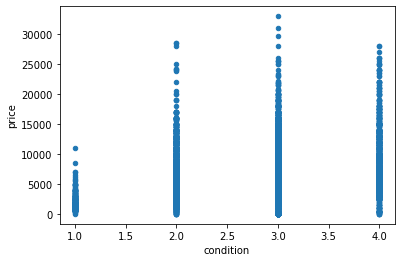

In [88]:
# Grafik scatter plot untuk variabel numerik usia kendaraan, jarak tempuh, dan kondisi-
# -terhadap price pada dataframe sedan

for col in ['car_age', 'dist_per_year', 'condition']:
    print(sedan_df.plot(x=col, y='price', kind='scatter'))
    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


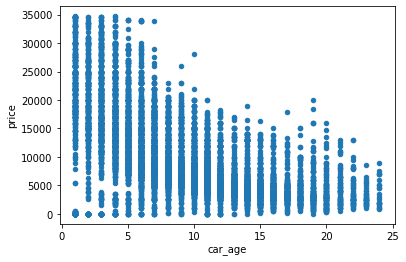

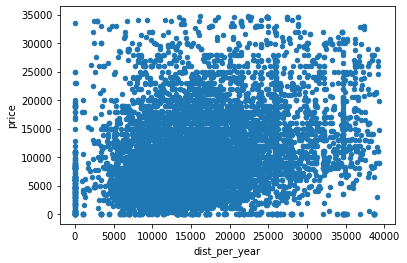

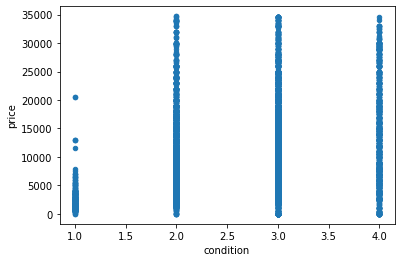

In [89]:
# Grafik scatter plot untuk variabel numerik usia kendaraan, jarak tempuh, dan kondisi-
# -terhadap price pada dataframe SUV

for col in ['car_age', 'dist_per_year', 'condition']:
    print(suv_df.plot(x=col, y='price', kind='scatter'))
  

## Kesimpulan Umum

&nbsp; Dataset yang dianalisa adalah dataset iklan kendaraan yang ditayangkan di situs web dengan berbagai macam karakteristik, seperti harga, model, tipe kendaraan, warna kendaraan dan lain sebagainya. Jumlah iklan adalah sebanyak 51.525, Namun terdapat karakteristik yang tidak terisi pada 25000 lebih iklan dalam dataset.

&nbsp; Kebersihan data dilakukan dengan cara mengatasi karakteristik (atau disebut kolom pada laporan analisa) yang hilang antara lain yang ada pada kolom `is_4wd`, `model_year`, `cylinders`, `odometer`, dan `paint_color`, memperbaiki tipe data, dan menambahkan kolom baru pada dataset. 

&nbsp; Beberapa cara dilakukan untuk menangani nilai kosong, antara lain:

 - Mengubah nilai menjadi tipe data boolean (hanya terdapat 2 nilai absolut pada kolom tersebut.)
 - Menyesuaikan nilai berdasarkan kolom lain.
 - Menghapus baris data.

&nbsp; Setelah membersihkan data, langkah selanjutnya adalah menganalisa parameter-parameter inti, yaitu adalah harga, usia kendaraan ketika iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi. Semua parameter terkecuali silinder, ditemukannya outlier atau nilai-nilai ekstrim yang jarang ditemukan. Nilai-nilai tersebut akan di-*filter* guna meningkatkan konsistensi hasil analisa akhir. Jumlah data bersih yang didapat adalah sebanyak 47.906.

&nbsp; Dengan data bersih, ditemukan bahwa rata-rata masa berlaku iklan ditayangkan selama 33 hingga 39 hari. Tipe kendaraan terbanyak pada tayangan iklan adalah kendaraan SUV, diikuti dengan mobil sedan, yang tiap tipe tersebut mencapai hingga 10.000 iklan. Kendaraan SUV dijual dengan harga rata-rata 17.500. Sedangkan, kendaraan sedan dijual dengan rata-rata 15.000.

&nbsp; Harga kendaraan SUV dan Sedan pada iklan yang ditayangkan sedikit berkorelasi dengan usia kendaraan, dimana semakin tua kendaraan yang dijual, harga kendaraan semakin murah, dan berlaku sebaliknya. Karakteristik lain hampir atau tidak sama sekali berkorelasi dengan harga kendaraan itu sendiri.
